In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

In [2]:
# define a function to show the img

def img_show(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # we use open cv to read the image
    plt.figure(figsize=(10,7))
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')
    plt.show()

In [8]:
# read image

img_path = 'your/img/path/image_name.image_format'
img = cv.imread(img_path)

In [6]:
# implement adaptive mean thresholding
# B: block size
# C: constant value

def adaptive_mean_thresholding(img,B,C):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY )
    thresholded_img = np.zeros((gray.shape)).astype(np.uint8)
    H = np.arange(0,gray.shape[0],B)
    H = np.append(H, gray.shape[0])
    W = np.arange(0,gray.shape[1],B)
    W = np.append(W, gray.shape[1])
    for i in range(len(H)-1):
        for j in range(len(W)-1):
            block = gray[H[i]:H[i+1],W[j]:W[j+1]]
            threshold = np.mean(block) - C
            th, block = cv.threshold(block, threshold, 255, cv.THRESH_BINARY)
            thresholded_img[H[i]:H[i+1],W[j]:W[j+1]] = block
            
    img_show(gray)
    img_show(thresholded_img)

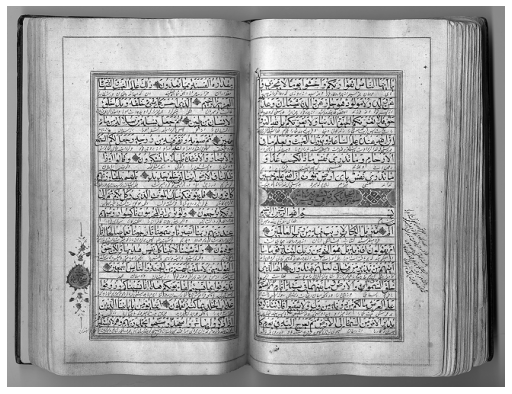

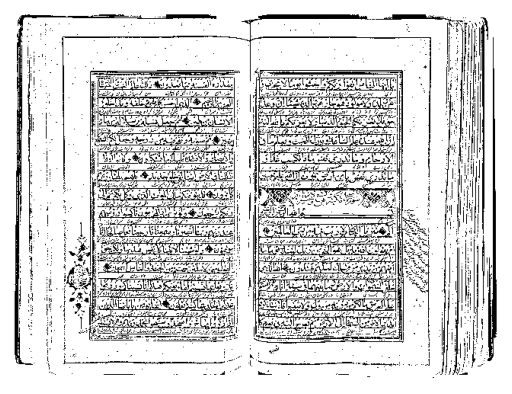

In [7]:
# result

B = 11
C = 30
adaptive_mean_thresholding(img,B,C)